In [1]:
import pandas as pd
import numpy as np

In [122]:
df=pd.read_excel('adaboost.xlsx')

In [123]:
df

,gender,age,income,illness,sample initial weight
0,m,41,40000,y,0.2
1,m,54,30000,n,0.2
2,f,42,25000,n,0.2
3,f,40,60000,y,0.2
4,m,46,50000,y,0.2


In [124]:
df.sample(20,weights=(0.084,0.084,0.084,0.65,0.084),replace=True).index.value_counts()

3    15
4     3
2     1
1     1
dtype: int64

In [125]:
from sklearn.preprocessing import LabelEncoder

In [126]:
le=LabelEncoder()

In [127]:
df.illness=le.fit_transform(df.illness)
df.illness

0    1
1    0
2    0
3    1
4    1
Name: illness, dtype: int32

In [128]:
df.gender=le.fit_transform(df.gender)
df.gender

0    1
1    1
2    0
3    0
4    1
Name: gender, dtype: int32

In [129]:
x=df.iloc[:,:-2]
y=df.iloc[:,-2]

In [130]:
x


,gender,age,income
0,1,41,40000
1,1,54,30000
2,0,42,25000
3,0,40,60000
4,1,46,50000


In [131]:
x_encoded=pd.get_dummies(x,drop_first=True)

In [119]:
y_encoded=pd.get_dummies(y,drop_first=True)

In [120]:
x_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   gender  5 non-null      int32
 1   age     5 non-null      int64
 2   income  5 non-null      int64
dtypes: int32(1), int64(2)
memory usage: 228.0 bytes


In [132]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [137]:
model=DecisionTreeClassifier(criterion='gini').fit(x_encoded,y_encoded)

[Text(0.5, 0.75, 'X[2] <= 35000.0\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

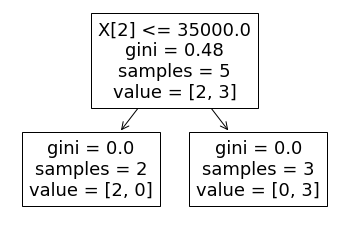

In [138]:
plot_tree(model)

In [139]:
y_pred=model.predict(x)

In [140]:
from sklearn.metrics import confusion_matrix

In [142]:
confusion_matrix(y_encoded,y_pred)

array([[2, 0],
       [0, 3]], dtype=int64)

In [143]:
total_errors=0

In [144]:
np.log(3)

1.0986122886681098

In [146]:
def amount_of_say(tatol_errors):
    amt=(0.5)*(np.log(2)*((1-total_errors)/total_errors))
    return amt

In [147]:
amount_of_say(0.2)

ZeroDivisionError: division by zero

In [148]:
old_weight=1/len(df)
old_weight

0.2

In [149]:
x=1.386

In [150]:
def new_weight(y,x):
    n_w=y*(2.7)**x
    return n_w

In [151]:
new_weight(0.2,1.386)

0.792319186544622

# adaboosting

In [152]:
from sklearn.ensemble import AdaBoostClassifier

In [153]:
ad=AdaBoostClassifier(n_estimators=10)

In [155]:
ada_model=ad.fit(x_encoded,y_encoded)

C:\Users\Ashok\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [156]:
ad.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=1732360707)]

[Text(0.5, 0.75, 'X[2] <= 35000.0\ngini = 0.48\nsamples = 5\nvalue = [0.4, 0.6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0.4, 0.0]'),
 Text(0.75, 0.25, 'gini = -0.0\nsamples = 3\nvalue = [0.0, 0.6]')]

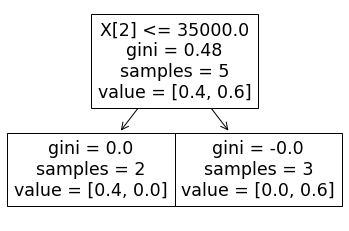

In [157]:
plot_tree(ad.estimators_[0])

In [158]:
ad.estimators_[0]

DecisionTreeClassifier(max_depth=1, random_state=1732360707)